---
title: "SWD Properties"
---

## Setup

In [1]:
#| hide
import hvplot.polars
import polars as pl
from loguru import logger

In [2]:
#| hide
%load_ext autoreload
%autoreload 2

Connect `python` with `R` kernel

In [3]:
from beforerr.r import py2rpy_polars
import rpy2.robjects as robjects

%load_ext rpy2.ipython

r = robjects.r
r.source('utils.R')

conv_pl = py2rpy_polars()

R[write to console]: 
Attaching package: ‘dplyr’


R[write to console]: The following objects are masked from ‘package:stats’:

    filter, lag


R[write to console]: The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




## Processing datasets

In [4]:
ts = 1 # unit: seconds
tau = 60 # unit: seconds
data_dir = "../data"
format = "arrow"

In [5]:
parameters = ['j0_k', 'j0_k_norm',  'L_k_fit', 'L_k', 'L_k_fit_norm', 'L_k_norm']

JNO_events_l1 = pl.read_ipc(f"{data_dir}/05_reporting/events.JNO.ts_{ts}s_tau_{tau}s.arrow").drop_nulls().with_columns(
  pl.col(parameters).abs()
)

Some extreme values are present in the data. We will remove them.

In [6]:
NVARS = ['d_star', 'L_mn', 'L_mn_norm', 'j0_mn', 'j0_mn_norm', 'duration', 'v_mn']
DISPLAY_VARS = ['time', 'sat'] + NVARS


def check_candidates(df):
    if isinstance(df, pl.LazyFrame):
        df = df.collect()
    logger.info(df.columns)
    return df.select(NVARS).describe()

check_candidates(JNO_events_l1)

2024-02-11 20:20:20.480 | INFO     | __main__:check_candidates:8 - ['time', 'tstart', 'tstop', 'd_tstart', 'd_tstop', 'd_time', 'time_before', 'time_after', 'duration', 'count', 'B_std', 'B_mean', 'dB_vec', 'index_diff', 'index_std', 'index_fluctuation', 'B.after', 'B.before', 'b_mag', 'b_n', 'bn_over_b', 'd_star', 'db_mag', 'db_over_b', 'db_over_b_max', 'fit.stat.chisqr', 'fit.stat.rsquared', 'fit.vars.amplitude', 'fit.vars.c', 'fit.vars.sigma', 'rotation_angle', 'dB_x', 'dB_y', 'dB_z', 'dB_lmn_x', 'dB_lmn_y', 'dB_lmn_z', 'k_x', 'k_y', 'k_z', 'Vl_x', 'Vl_y', 'Vl_z', 'Vn_x', 'Vn_y', 'Vn_z', 'radial_distance', 'plasma_density', 'plasma_temperature', 'model_b_r', 'model_b_t', 'model_b_n', 'v_x', 'v_y', 'v_z', 'plasma_speed', 'B_background_x', 'B_background_y', 'B_background_z', 'v_x_before', 'v_y_before', 'v_z_before', 'n.before', 'v.ion.before', 'T.before', 'v_x_after', 'v_y_after', 'v_z_after', 'n.after', 'v.ion.after', 'T.after', 'v_l', 'v_n', 'v_k', 'v_mn', 'L_k_fit', 'L_n', 'L_mn', 

statistic,d_star,L_mn,L_mn_norm,j0_mn,j0_mn_norm,duration,v_mn
str,f64,f64,f64,f64,f64,str,f64
"""count""",63143.0,63143.0,63143.0,63143.0,63143.0,"""63143""",63143.0
"""null_count""",0.0,0.0,0.0,0.0,0.0,"""0""",0.0
"""mean""",-21.895962,11582.554988,56.558356,-51.65267,-0.023676,"""0:00:33.520295…",347.244683
"""std""",5339.238849,5808.190612,40.936954,13293.48011,457.294081,null,87.695412
"""min""",-1.3263e6,122.817386,0.283859,-3.3040e6,-74114.493702,"""0:00:03""",3.579199
"""25%""",-0.090603,7032.074098,27.272885,-0.217859,-0.033368,"""0:00:22""",299.664071
"""50%""",0.017936,11065.353734,46.871694,0.041097,0.005316,"""0:00:34""",350.497523
"""75%""",0.119702,15555.173252,74.245455,0.290018,0.045562,"""0:00:45""",398.402401
"""max""",148831.510754,42988.873235,441.381155,412230.189043,84109.098353,"""0:01:00""",743.294369


In [8]:
JNO_events_l1.select('j0_k').sort('j0_k', descending=True).head(100)

j0_k
f64
3.5708e6
458727.606012
150746.200451
130830.105874
123509.617814
122695.660892
92220.942571
77164.854987
71169.871777


In [ ]:
JNO_events_l1 = JNO_events_l1.filter(
    pl.col("d_star") < 100,  # exclude extreme values
    # pl.col('j0_mn') < 100,
    pl.col('j0_k') < pl.col('j0_k').quantile(0.99),
    pl.col('j0_k') > pl.col('j0_k').quantile(0.01),
    # pl.col('j0_k_fit') < pl.col('j0_k_fit').quantile(0.99),
    # pl.col('j0_k_fit') > pl.col('j0_k_fit').quantile(0.01)
)

%R -i JNO_events_l1 -c conv_pl


In [ ]:
%%R
x_col <- "radial_distance"
y_col <- "j0_k"
y_lim <- c(0.01, 15)
# y_lim <- NULL
xlab <- "Radial Distance (AU)"
ylab <- expression(Log~J~(nA~m^-2))
p <- plot_binned_data(JNO_events_l1, x_col = x_col, y_col = y_col, x_bins = 8, y_bins = 32, y_lim = y_lim, log_y = TRUE)
p <- p + labs(x = xlab, y= ylab)
save_plot("new/current/current_k_r_dist")

y_col <- "j0_k_norm"
y_lim <- c(0.002, 1)
y_lim <- NULL
ylab <- expression(Log~Normalized~J~(J[A]))
p <- plot_binned_data(JNO_events_l1, x_col = x_col, y_col = y_col, x_bins = 8, y_bins = 32, y_lim = y_lim, log_y = TRUE)
p <- p + labs(x = xlab, y= ylab)
save_plot("new/current/current_k_N1_r_dist")
p

Saving 6.67 x 6.67 in image
Saving 6.67 x 6.67 in image
Saving 6.67 x 6.67 in image
Saving 6.67 x 6.67 in image


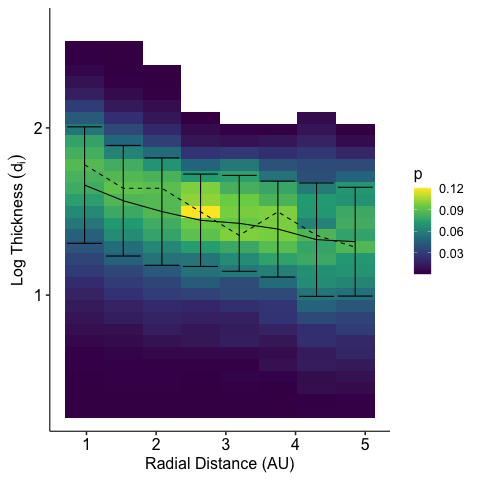

In [79]:
%%R
x_col <- "radial_distance"
xlab <- "Radial Distance (AU)"

y_col <- "L_k"
ylab <- "Log Thickness (km)"
y_lim <- c(1000, 50000)
# y_lim <- NULL
p <- plot_binned_data(JNO_events_l1, x_col = x_col, y_col = y_col, x_bins = 8, y_bins = 32, y_lim = y_lim, log_y = TRUE)
p <- p + labs(x = xlab, y= ylab)
save_plot("new/thickness/thickness_k_r_dist")

y_col <- "L_k_norm"
y_lim <- c(2, 400)
# y_lim <- NULL
ylab <- expression(Log~Thickness~(d[i]))
p <- plot_binned_data(JNO_events_l1, x_col = x_col, y_col = y_col, x_bins = 8, y_bins = 32, y_lim = y_lim, log_y = TRUE)
p <- p + labs(x = xlab, y= ylab)
save_plot("new/thickness/thickness_k_N1_r_dist")
p

Saving 6.67 x 6.67 in image
Saving 6.67 x 6.67 in image


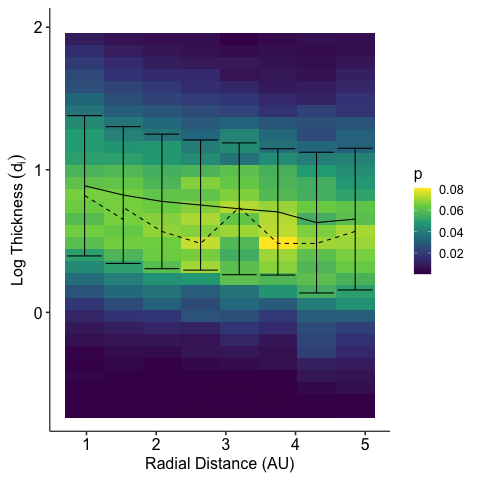

In [40]:
%%R
x_col <- "radial_distance"
xlab <- "Radial Distance (AU)"

y_col <- "L_k_fit"
ylab <- "Log Thickness (km)"
y_lim <- c(100, 40000)
# y_lim <- NULL
p <- plot_binned_data(JNO_events_l1, x_col = x_col, y_col = y_col, x_bins = 8, y_bins = 32, y_lim = y_lim, log_y = TRUE)
p <- p + labs(x = xlab, y= ylab)
# save_plot("new/thickness/thickness_k_fit_r_dist")

y_col <- "L_k_fit_norm"
y_lim <- c(0.2, 100)
# y_lim <- NULL
ylab <- expression(Log~Thickness~(d[i]))
p <- plot_binned_data(JNO_events_l1, x_col = x_col, y_col = y_col, x_bins = 8, y_bins = 32, y_lim = y_lim, log_y = TRUE)
p <- p + labs(x = xlab, y= ylab)
save_plot("new/thickness/thickness_k_fit_N1_r_dist")
p